# Task 1: Data Preparation

## Loading the Data
 • Download the provided folder that contains the Devnagari digits dataset.
 
 • Use the Python Imaging Library (PIL) to load and read the image files from the dataset.
 
 • Convert the images into Numpy arrays and normalize them to a range of 0-1.
 
 • use train folder for training and test for testing.
 
 • Extract the corresponding labels for each image.

 Hints:
 
 • Ensure that the images are resized to a consistent shape (e.g., 28x28).
 
 • Convert labels to one-hot encoded format for multi-class classification.

Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


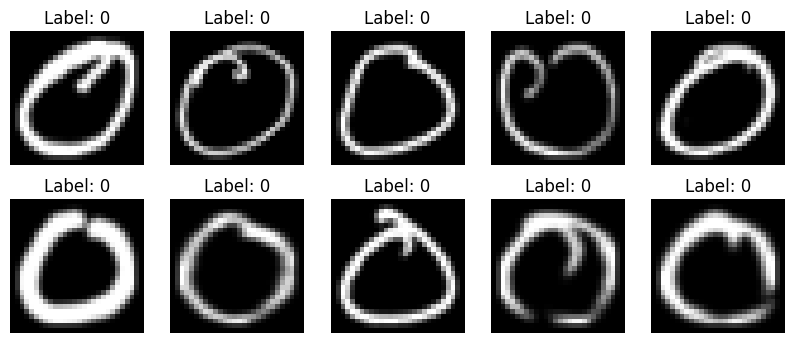

In [48]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image  # Import Pillow

# Define dataset paths
train_dir = "/kaggle/input/devnagari/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/kaggle/input/devnagari/DevanagariHandwrittenDigitDataset/Test"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            
            # Load image using PIL
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28, 28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
            
            images.append(img)
            labels.append(label)
    
    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shapes
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

# Task 2: Build the FCN Model

## Model Architecture

 • Create a Sequential model using Keras.
     
 • Add 3 hidden layers with the following number of neurons:
 
 – 1st hidden layer: 64 neurons
 
 – 2nd hidden layer: 128 neurons
 
 – 3rd hidden layer: 256 neurons
 
• Use sigmoid activation functions for all hidden layers.
 
 • Add an output layer with 10 units with softmax (since Devnagari digits have 10 classes) and a
 softmax activation function.

In [49]:
import tensorflow as tf
from tensorflow import keras

# Define the number of output classes and input shape
num_classes = 10
input_shape = (28, 28, 1)

# Build the model using Keras Sequential API
model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),  # Input layer specifying input shape
        keras.layers.Flatten(),  # flattening the 28x28 image to a 784-dimensional vector
        keras.layers.Dense(64, activation="sigmoid"),  # Dense layer with 64 neurons and sigmoid activation
        keras.layers.Dense(128, activation="sigmoid"),  # Dense layer with 128 neurons and sigmoid activation
        keras.layers.Dense(256, activation="sigmoid"),  # Dense layer with 256 neurons and sigmoid activation
        keras.layers.Dense(num_classes, activation="softmax"),  # Output layer with 10 neurons and softmax activation
    ]
)

In [50]:
 model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

# Task 3: Compile the Model

## Model Compilation

 • Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
 and evaluation metric (e.g., accuracy).

In [51]:
# Recompile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Task 4: Train the Model
 ## Model Training
 
• Use the model.fit() function to train the model. Set the batch size to 128 and the number of
 epochs to 20.
 
• Use validation split (validation
 data.
 split=0.2) to monitor the model’s performance on validation
 
• Optionally, use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model
 and avoiding overfitting.

In [52]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=20,
    validation_split = 0.2,
    # callbacks=[early_stopping], 
    verbose=1
)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2947 - loss: 1.9409 - val_accuracy: 0.0000e+00 - val_loss: 7.6657
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8162 - loss: 0.6262 - val_accuracy: 0.0000e+00 - val_loss: 8.9652
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9167 - loss: 0.2982 - val_accuracy: 0.0000e+00 - val_loss: 9.7617
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9450 - loss: 0.1953 - val_accuracy: 0.0000e+00 - val_loss: 10.1109
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9575 - loss: 0.1513 - val_accuracy: 0.0000e+00 - val_loss: 10.4657
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9656 - loss: 0.1198 - val_accuracy: 0.0000e+00 - val_loss: 10.6438
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9731 - loss: 0.1007 - val_accuracy: 0.0000e+00 - val_loss: 10.9717
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9734 

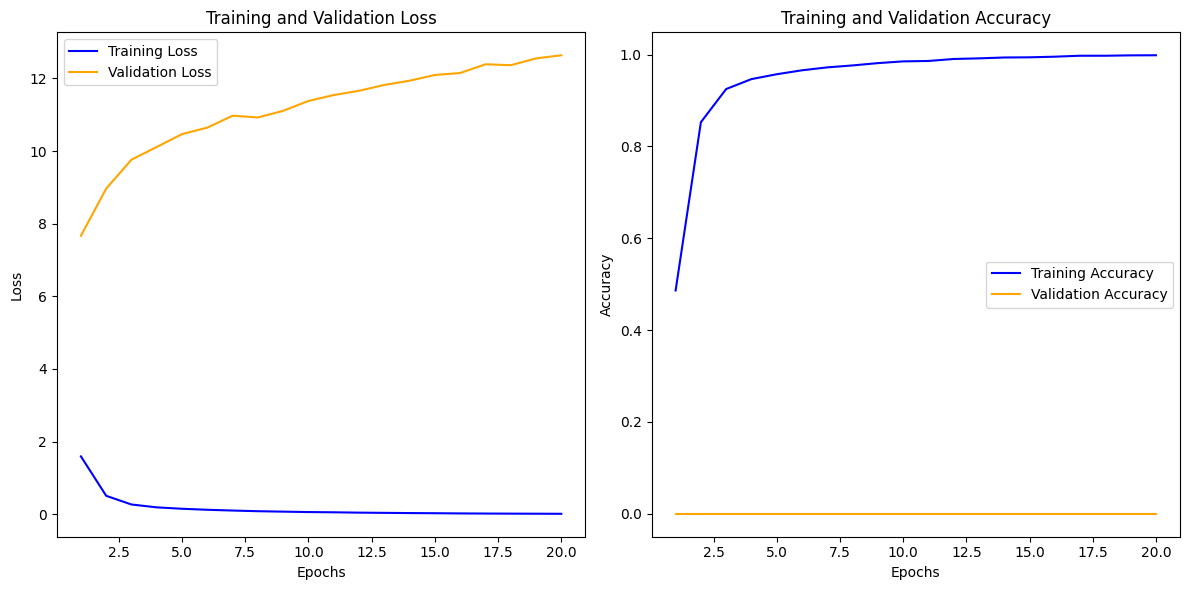

In [53]:
import matplotlib.pyplot as plt

# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Task 5: Evaluate the Model

## Model Evaluation
 
• After training, evaluate the model using model.evaluate() on the test set to check the test
 accuracy and loss.

In [54]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.7830 - loss: 2.5878
Test accuracy: 0.7830


# Task 6: Save and Load the Model

## Model Saving and Loading
 
• Save the trained model to an .h5 file using model.save().

• Load the saved model and re-evaluate its performance on the test set.

In [55]:
model.save('trained_model.h5')

In [56]:
loaded_model = tf.keras.models.load_model('trained_model.h5')

# Task 7: Predictions

## Making Predictions

• Use model.predict() to make predictions on test images.

• Convert the model’s predicted probabilities to digit labels using np.argmax().

In [57]:
import numpy as np

# Use the model to predict probabilities for the test dataset
predictions = loaded_model.predict(x_test)

# Convert the predicted probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)  # Takes the index of the maximum probability for each sample

# Display the predicted labels
print("Predicted Labels:", predicted_labels)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted Labels: [0 0 0 ... 4 6 4]


In [58]:
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9592 - loss: 0.3853
Test Loss: 2.587754487991333
Test Accuracy: 0.7829999923706055
